In [0]:
import tensorflow as tf
import numpy as np

> # **Aula 016** - Perceptron de uma camada - **Tensorflow: Redes Neurais - Classificação e Regressão**

In [0]:
def step_function(x):
  # x >= 1 return 1.0 else return 0.0
  return tf.cast( tf.to_float(tf.math.greater_equal(x, 1)) , tf.float64)

In [0]:
# - exemplo: porta lógica OR -

'''
 | A | B | A or B |
 | 0 | 0 |   0    | 
 | 0 | 1 |   1    |  
 | 1 | 0 |   1    |  
 | 1 | 1 |   1    |
'''

# entrada
X = np.array([[0.0, 0.0],
              [0.0, 1.0],
              [1.0, 0.0],
              [1.0, 1.0]])

# saida
y = np.array([[0.0],
              [1.0],
              [1.0],
              [1.0]])

# pesos
# [2, 1] = tamanho da matriz de zeros 2 linhas x 1 coluna - 2 linhas por conta das duas entradas
W = tf.Variable(tf.zeros([2, 1], dtype = tf.float64))

camada_saida = tf.matmul(X, W)
camada_saida_ativacao = step_function(camada_saida)

# calculo e ajuste dos erros - peso(n+1) = peso(n) + (taxa_aprendizagem * entrada * erro) -
erro = tf.subtract(y, camada_saida_ativacao)

# transpose_a = True -> realizando o calculo com a matriz transposta de X 
# para não ter erro com as dimenções das matrizes no cálculo
delta = tf.matmul(X, erro, transpose_a=True)

# tf.assigin(W, ...) -> permite que a váriavel W seja atualizada durante a execução
treinamento = tf.assign(W, tf.add(W, tf.multiply(delta, 0.1)) )

In [0]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)

  print(f'X\n{X}', end='\n'*2)
  print(f'y\n{y}', end='\n'*2)  

  print(f'W\n{sess.run(W)}', end='\n'*2)
  print(f'camada_saida\n{sess.run(camada_saida)}', end='\n'*2)
  print(f'camada_saida_ativacao\n{sess.run(camada_saida_ativacao)}', end='\n'*2)
  
  print(f'erro\n{sess.run(erro)}', end='\n'*2)
  print(f'treinamento\n{sess.run(treinamento)}', end='\n'*2)

  epochs = 0
  for i in range(15):
    epochs += 1
    # o erro_total é um vetor com os erros de cada registro
    erro_total, _ = sess.run([erro, treinamento])
    erro_soma = tf.reduce_sum(erro_total)

    print(f'época {epochs} - erro_total: {sess.run(erro_soma)}')

    if(erro_soma.eval() == 0.0):
      break
  
  W_final = sess.run(W)
  print( '\n' + f'W_final\n{W_final}')

X
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]

y
[[0.]
 [1.]
 [1.]
 [1.]]

W
[[0.]
 [0.]]

camada_saida
[[0.]
 [0.]
 [0.]
 [0.]]

camada_saida_ativacao
[[0.]
 [0.]
 [0.]
 [0.]]

erro
[[0.]
 [1.]
 [1.]
 [1.]]

treinamento
[[0.2]
 [0.2]]

época 1 - erro_total: 3.0
época 2 - erro_total: 3.0
época 3 - erro_total: 2.0
época 4 - erro_total: 2.0
época 5 - erro_total: 2.0
época 6 - erro_total: 2.0
época 7 - erro_total: 0.0

W_final
[[1.]
 [1.]]


In [0]:
# testando a rede neural

camada_saida_teste = tf.matmul(X, W_final)
camada_saida_ativacao_teste = step_function(camada_saida_teste)

print(' - teste do exemplo da porta lógica OR - \n')
with tf.Session() as sess:
  sess.run(init)
  print(f'teste com entrada\n{X}' + '\n'*2 + f'pesos\n{W_final}' + '\n'*2 + f'resultado\n{sess.run(camada_saida_ativacao_teste)}')

 - teste do exemplo da porta lógica OR - 

teste com entrada
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]

pesos
[[1.]
 [1.]]

resultado
[[0.]
 [1.]
 [1.]
 [1.]]


> # **Aula 017** - Classificação binária XOR - **Tensorflow: Redes Neurais - Classificação e Regressão**

In [0]:
# - exemplo: porta lógica XOR - problema não linearmente separavel

'''
 | A | B | A xor B |
 | 0 | 0 |    0    | 
 | 0 | 1 |    1    |  
 | 1 | 0 |    1    |  
 | 1 | 1 |    0    |
'''

'''
Estrutura da rede neural implementada abaixo (sem o BIAS)

E = Entrada | O = Camada oculta | S = Saida

  E    O    S
       ◯ ↘
  ◯ ⇶            
       ◯ →  □□
  ◯ ⇶           
       ◯ ↗

'''

# entrada
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# saida
y = np.array([[0],
              [1],
              [1],
              [0]])

neuronios_entrada = 2
neuronios_camada_oculta = 3
neuronios_saida = 1

# pesos
W = {
  'oculta': tf.Variable(tf.random_normal([neuronios_entrada, neuronios_camada_oculta]), name='w_camada_oculta'),
  'saida': tf.Variable(tf.random_normal([neuronios_camada_oculta, neuronios_saida]), name='w_camada_saida')
}

bias = {
    'oculta': tf.Variable(tf.random_normal([neuronios_camada_oculta]), name='w_bias_oculta'),
    'saida': tf.Variable(tf.random_normal([neuronios_saida]), name='w_bias_saida')
}

In [0]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  print(f'w_camada_oculta\n{sess.run(W["oculta"])}', end='\n'*2)
  print(f'w_camada_saida\n{sess.run(W["saida"])}', end='\n'*2)

  print(f'w_bias_camada_oculta\n{sess.run(bias["oculta"])}', end='\n'*2)
  print(f'w_bias_camada_saida\n{sess.run(bias["saida"])}', end='\n'*2)

w_camada_oculta
[[-1.5901126   0.6113387   1.2026505 ]
 [-2.6637514  -0.07413919  1.1995958 ]]

w_camada_saida
[[-1.2891818 ]
 [-1.1485958 ]
 [ 0.40277454]]

w_bias_camada_oculta
[ 0.10380564 -0.84043133  0.23701848]

w_bias_camada_saida
[-0.7665538]



In [0]:
xph = tf.placeholder(tf.float32, [len(X), neuronios_entrada], name='xph')
yph = tf.placeholder(tf.float32, [len(y), neuronios_saida], name='yph')

camada_oculta = tf.add(bias['oculta'], tf.matmul(xph, W['oculta']))
camada_oculta_ativacao = tf.sigmoid(camada_oculta)

camada_saida = tf.add(bias['saida'], tf.matmul(camada_oculta_ativacao, W['saida']))
camada_saida_ativacao = tf.sigmoid(camada_saida)

erro = tf.losses.mean_squared_error(yph, camada_saida_ativacao)
otimizador = tf.train.GradientDescentOptimizer(learning_rate=0.3).minimize(erro)

with tf.Session() as sess:
  sess.run(init)
  print(f'camada_oculta\n{sess.run(camada_oculta_ativacao, feed_dict={xph:X})}', end='\n'*2)
  print(f'camada_saida\n{sess.run(camada_saida_ativacao, feed_dict={xph:X})}', end='\n'*2)

  for epochs in range(10000):
    erro_medio = 0
    _, custo = sess.run([otimizador, erro], feed_dict={xph:X, yph:y})
    
    if(epochs % 200 == 0):
      erro_medio += custo / 4
      print(f'erro_medio - {erro_medio}')
  
  W_final, bias_final = sess.run([W, bias])

camada_oculta
[[0.43556595 0.5055324  0.9134172 ]
 [0.63499796 0.5251287  0.6701123 ]
 [0.5461176  0.767557   0.9328738 ]
 [0.73064405 0.7812622  0.7279597 ]]

camada_saida
[[0.5233755 ]
 [0.45381576]
 [0.548393  ]
 [0.4855935 ]]

erro_medio - 0.06324931979179382
erro_medio - 0.06230480223894119
erro_medio - 0.06136132776737213
erro_medio - 0.059779487550258636
erro_medio - 0.05704326182603836
erro_medio - 0.0527028813958168
erro_medio - 0.04682537540793419
erro_medio - 0.03934159874916077
erro_medio - 0.029795270413160324
erro_medio - 0.020316436886787415
erro_medio - 0.013413483276963234
erro_medio - 0.009137379005551338
erro_medio - 0.006564868614077568
erro_medio - 0.004962650127708912
erro_medio - 0.0039121960289776325
erro_medio - 0.0031884736381471157
erro_medio - 0.0026679623406380415
erro_medio - 0.002279856475070119
erro_medio - 0.0019816490821540356
erro_medio - 0.0017466777935624123
erro_medio - 0.001557576353661716
erro_medio - 0.001402617315761745
erro_medio - 0.001273660

In [0]:
W_final

{'oculta': array([[ 3.9860098,  6.0558915, -1.6823252],
        [ 3.9146874,  6.1092863, -2.125828 ]], dtype=float32),
 'saida': array([[-8.447069 ],
        [ 8.495853 ],
        [ 1.0917118]], dtype=float32)}

In [0]:
bias_final

{'oculta': array([-6.064487 , -2.6348426,  2.9496903], dtype=float32),
 'saida': array([-4.8013706], dtype=float32)}

In [0]:
# testando a rede neural
camada_oculta_teste = tf.add(bias_final['oculta'], tf.matmul(xph, W_final['oculta']))
camada_oculta_ativacao_teste = tf.sigmoid(camada_oculta_teste)

camada_saida_teste = tf.add(bias_final['saida'], tf.matmul(camada_oculta_ativacao_teste, W_final['saida']))
camada_saida_ativacao_teste = tf.sigmoid(camada_saida_teste)

print(' - teste do exemplo da porta lógica XOR - \n')
with tf.Session() as sess:
  sess.run(init)
  print(f'teste com entrada\n{X}' + '\n'*2 + f'resultado\n{sess.run(camada_saida_ativacao_teste, feed_dict={xph:X})}')

 - teste do exemplo da porta lógica XOR - 

teste com entrada
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

resultado
[[0.0386075 ]
 [0.9649921 ]
 [0.9657138 ]
 [0.03672892]]


> # **Aula 018** - Classificação multiclasse - **Tensorflow: Redes Neurais - Classificação e Regressão**

In [0]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# dataset iris info - https://archive.ics.uci.edu/ml/datasets/Iris
iris = datasets.load_iris()

In [0]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
'''
Estrutura da rede neural implementada abaixo (sem o BIAS)

E = Entrada | O = Camada oculta | S = Saida

  E   O    S
  ◯ ⇶ ◯ ⇶
           ◯  
  ◯ ⇶ ◯ ⇶        
           ◯
  ◯ ⇶ ◯ ⇶          
           ◯
  ◯ ⇶ ◯ ⇶

Três neuronios de saida onde cada neuroino é uma classe e sua 
saida representa a probabilidade da entrada ser dessa classe
'''

X = iris.data
y = iris.target

# pre-processamento dos dados
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
y = y.reshape(-1, 1)

# Divide cada atributo na quantidade existente de classes para que a saida da probabilidade de cada uma seja possivel
# o numero é o indice do numero 1 na lista
onehot = OneHotEncoder()
y = onehot.fit_transform(y).toarray()
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [0]:
# separando dados para treinamento e testes
x_training, x_test, y_training, y_test = train_test_split(X, y, test_size=0.3)

# definindo estrutura da rede neural
neuronios_entrada = X.shape[1]
neuronios_camada_oculta = int(np.ceil((X.shape[1] + y.shape[1]) / 2))
neuronios_saida = y.shape[1]

# pesos
W = {
  'oculta': tf.Variable(tf.random_normal([neuronios_entrada, neuronios_camada_oculta])),
  'saida': tf.Variable(tf.random_normal([neuronios_camada_oculta, neuronios_saida]))
}

bias = {
  'oculta': tf.Variable(tf.random_normal([neuronios_camada_oculta])),
  'saida': tf.Variable(tf.random_normal([neuronios_saida]))
}

# placeholders
xph = tf.placeholder('float', [None, neuronios_entrada])
yph = tf.placeholder('float', [None, neuronios_saida])

In [0]:
def mlp(x, W, bias):
  camada_oculta = tf.add(tf.matmul(x, W['oculta']), bias['oculta'])
  camada_oculta_ativacao = tf.nn.relu(camada_oculta)

  camada_saida = tf.add( tf.matmul(camada_oculta_ativacao, W['saida']), bias['saida'])
  return camada_saida

In [0]:
modelo = mlp(xph, W, bias)
erro = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits= modelo, labels= yph) )
otimizador = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(erro)
batch_size = 8

In [0]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(3000):
    erro_medio = 0.0
    batch_total = len(x_training) // batch_size
    X_batches = np.array_split(x_training, batch_total)
    Y_batches = np.array_split(y_training, batch_total)
    for i in range(batch_total):
      x_batch, y_batch = X_batches[i], Y_batches[i]
      _, custo = sess.run([otimizador, erro], feed_dict={xph: x_batch, yph: y_batch})
      erro_medio += custo / batch_total
    if(epoch % 500 == 0):
      print(f'época {epoch} - erro_medio - {erro_medio}')
  
  W_final, bias_final = sess.run([W, bias])

época 0 - erro_medio - 2.390012942827665
época 500 - erro_medio - 0.505079780633633
época 1000 - erro_medio - 0.3937390561287219
época 1500 - erro_medio - 0.30581688479735303
época 2000 - erro_medio - 0.2262416120905143
época 2500 - erro_medio - 0.16705408348486975


In [0]:
W_final

{'oculta': array([[ 0.41086158, -1.8052688 , -3.1707854 ,  0.64712745],
        [-1.7381347 , -0.88341886,  0.78772163, -0.31144103],
        [ 1.0457602 ,  0.40577677, -1.1274812 , -1.1576369 ],
        [ 2.1395428 , -1.3920125 , -0.62457407, -0.3982961 ]],
       dtype=float32), 'saida': array([[-3.0093894 , -0.20861554,  0.35009098],
        [-0.3162394 ,  0.06750153, -0.52479756],
        [ 2.0669436 ,  0.33477852, -0.11970302],
        [ 0.64425653,  2.1230395 , -2.0304346 ]], dtype=float32)}

In [0]:
bias_final

{'oculta': array([1.6246567, 1.0904431, 1.4723676, 0.9861169], dtype=float32),
 'saida': array([-0.88945186, -0.28555742, -0.28505132], dtype=float32)}

In [0]:
# previsoes
previsoes_teste = mlp(xph, W_final, bias_final)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  # previsao pura
  r1 = sess.run(previsoes_teste, feed_dict={xph: x_test})
  # probabilidade
  r2 = sess.run(tf.nn.softmax(r1))
  # dado limpo
  r3 = sess.run(tf.arg_max(r2, 1))

# comparando previsoes com a saida correta
y_test2 = np.argmax(y_test, 1)

taxa_acerto = accuracy_score(y_test2, r3)
taxa_acerto

0.9777777777777777

> # **Aula 018** - Base de dados de dígitos manuscritos - **Tensorflow: Redes Neurais - Classificação e Regressão**

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets('mnist/', one_hot=True)

len(mnist.train.images) + len(mnist.test.images)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


65000

In [0]:
x_training = mnist.train.images
print(f'x_training.shape - {x_training.shape}')
print(f'x_training[0]\n{x_training[0]}', end='\n'*2)
y_training = mnist.train.labels
print(f'y_training.shape - {y_training.shape}')
print(f'y_training[0] - {y_training[0]}', end='\n'*2)
x_test = mnist.test.images
print(f'x_test.shape - {x_test.shape}')
print(f'x_test[0]\n{x_test[0]}', end='\n'*2)
y_test = mnist.test.labels
print(f'y_test.shape - {y_test.shape}')
print(f'y_test[0] - {y_test[0]}')

x_training.shape - (55000, 784)
x_training[0]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.       

Visualizando dado do dataset



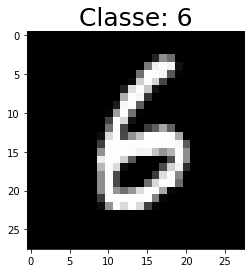

In [0]:
img_index = 6140
plt.imshow(x_training[img_index].reshape(28,28), cmap='gray')
plt.title(f'Classe: {np.argmax(y_training[img_index])}', fontdict={'size':25})
print('Visualizando dado do dataset', end='\n'*2)

In [0]:
neuronios_entrada = x_training.shape[1]
# fórmula para quantidade de neuronios para camada oculta: x = numero_entradas + quantidade_classes // 2
camada_oculta_1 = (x_training.shape[1] + y_training.shape[1]) // 2
camada_oculta_2 = camada_oculta_1
camada_oculta_3 = camada_oculta_1
neuronios_saida =  y_training.shape[1]

In [0]:
neuronios_entrada

784

In [0]:
camada_oculta_1

397

In [0]:
neuronios_saida

10

In [0]:
'''
Estrutura da rede neural implementada (sem o BIAS)

E = Entrada | O = Camada oculta | S = Saida

  E   O   O   O    S
  ◯ ⇶ ◯ ⇶ ◯ ⇶ ◯ ⇶
                   ◯  
  ◯ ⇶ ◯ ⇶ ◯ ⇶ ◯ ⇶        
                   ◯
  ◯ ⇶ ◯ ⇶ ◯ ⇶ ◯ ⇶          
                   ◯
  ◯ ⇶ ◯ ⇶ ◯ ⇶ ◯ ⇶  .
  .   .   .   .    .
  .   .   .   .    .
  .   .   .   .    .

Entrada - 784 neuronios
Camada oculta - 397 neuronios (em cada uma das trẽs camadas ocultas)
Saida - 10 neuronios
'''

# pesos
W = {
  'oculta1': tf.Variable(tf.random_normal([neuronios_entrada, camada_oculta_1])), 
  'oculta2': tf.Variable(tf.random_normal([camada_oculta_1,   camada_oculta_2])),
  'oculta3': tf.Variable(tf.random_normal([camada_oculta_2,   camada_oculta_3])),
  'saida': tf.Variable(tf.random_normal([camada_oculta_3, neuronios_saida]))
}

bias = {
  'oculta1': tf.Variable(tf.random_normal([camada_oculta_1])),
  'oculta2': tf.Variable(tf.random_normal([camada_oculta_2])),
  'oculta3': tf.Variable(tf.random_normal([camada_oculta_3])),
  'saida': tf.Variable(tf.random_normal([neuronios_saida]))
}

def mlp(x, W, bias):
  # camada_oculta_N = função_ativação ( bias (X,  multiplicando_entrada_pesos( Y, Z ) ) )
  camada_oculta_1 = tf.nn.relu( tf.add( bias['oculta1'], tf.matmul(x, W['oculta1'] ) ) )
  camada_oculta_2 = tf.nn.relu( tf.add( bias['oculta2'], tf.matmul(camada_oculta_1, W['oculta2'] ) ) )
  camada_oculta_3 = tf.nn.relu( tf.add( bias['oculta3'], tf.matmul(camada_oculta_2, W['oculta3'] ) ) )
  camada_saida = tf.add(bias['saida'], tf.matmul(camada_oculta_3, W['saida']))
  return camada_saida

xph = tf.placeholder('float', [None, neuronios_entrada])
yph = tf.placeholder('float', [None, neuronios_saida])

modelo = mlp(xph, W, bias)
erro = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits= modelo, labels= yph))
otimizador = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(erro)

# previsoes
init = tf.global_variables_initializer()
previsoes_teste = tf.nn.softmax(modelo)
previsoes_corretas = tf.equal(tf.argmax(previsoes_teste, 1), tf.argmax(yph, 1))
taxa_acerto = tf.reduce_mean(tf.cast(previsoes_corretas, tf.float32))

with tf.Session() as sess:
  sess.run(init)
  print('Treinamento')
  for epoch in range(5000):
    X_batch, y_batch = mnist.train.next_batch(128)
    _, custo = sess.run([otimizador, erro], feed_dict={xph: X_batch, yph: y_batch})

    if(epoch % 100 == 0):
      acc = sess.run([taxa_acerto], feed_dict={xph: X_batch, yph: y_batch})
      print(f'época {epoch} -> erro: {custo} | acc: {acc}')

  print('\nTaxa de acerto')
  print(sess.run(taxa_acerto, feed_dict={xph: x_test, yph: y_test}))

Treinamento
época 0 -> erro: 42425.0234375 | acc: [0.1015625]
época 100 -> erro: 16108.0703125 | acc: [0.15625]
época 200 -> erro: 8520.953125 | acc: [0.359375]
época 300 -> erro: 6027.59912109375 | acc: [0.484375]
época 400 -> erro: 4731.49365234375 | acc: [0.53125]
época 500 -> erro: 3871.7705078125 | acc: [0.5703125]
época 600 -> erro: 2808.26953125 | acc: [0.6953125]
época 700 -> erro: 3230.0498046875 | acc: [0.65625]
época 800 -> erro: 2981.89111328125 | acc: [0.71875]
época 900 -> erro: 2234.716064453125 | acc: [0.7265625]
época 1000 -> erro: 3274.86279296875 | acc: [0.6796875]
época 1100 -> erro: 1869.9495849609375 | acc: [0.8125]
época 1200 -> erro: 2225.98828125 | acc: [0.7734375]
época 1300 -> erro: 2045.0531005859375 | acc: [0.7578125]
época 1400 -> erro: 1663.361328125 | acc: [0.7890625]
época 1500 -> erro: 1829.8822021484375 | acc: [0.796875]
época 1600 -> erro: 1814.7877197265625 | acc: [0.7734375]
época 1700 -> erro: 868.484130859375 | acc: [0.890625]
época 1800 -> erro:

> # **Aula 019** - Classificação com Estimators - **Tensorflow: Redes Neurais - Classificação e Regressão**

In [0]:
import pandas as pd

base = pd.read_csv('census.csv')
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
base.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [0]:
def converte_classe(rotulo):
  if(rotulo == ' <=50K'):
    return 1
  else:
    return 0
base.income = base.income.apply(converte_classe)
base.income.unique()

array([1, 0])

In [0]:
X = base.drop('income', axis=1)
y = base.income

x_training, x_test, y_training, y_test = train_test_split(X, y, test_size=0.3)
base.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [0]:
# colunas categoricas
workclass      = tf.feature_column.categorical_column_with_hash_bucket(key = 'workclass', hash_bucket_size=100)
education      = tf.feature_column.categorical_column_with_hash_bucket(key = 'education', hash_bucket_size=100)
marital_status = tf.feature_column.categorical_column_with_hash_bucket(key = 'marital-status', hash_bucket_size=100)
occupation     = tf.feature_column.categorical_column_with_hash_bucket(key = 'occupation', hash_bucket_size=100)
relationship   = tf.feature_column.categorical_column_with_hash_bucket(key = 'relationship', hash_bucket_size=100)
race           = tf.feature_column.categorical_column_with_hash_bucket(key = 'race', hash_bucket_size=100)
sex            = tf.feature_column.categorical_column_with_vocabulary_list(key = 'sex', vocabulary_list=[' Male', ' Female'])
native_country = tf.feature_column.categorical_column_with_hash_bucket(key = 'native-country', hash_bucket_size=100)

# colunas numéricas
age           = tf.feature_column.numeric_column(key = 'age')
final_weight  = tf.feature_column.numeric_column(key = 'final-weight')
capital_gain  = tf.feature_column.numeric_column(key = 'capital-gain')
education_num = tf.feature_column.numeric_column(key = 'education-num')
capital_loss  = tf.feature_column.numeric_column(key = 'capital-loos')
hour          = tf.feature_column.numeric_column(key = 'hour-per-week')

# colunas
colunas = [age, workclass, final_weight, education, education_num,
           marital_status, occupation, relationship, race, sex,
           capital_gain, capital_loss, hour, native_country]

In [0]:
embedde_workclass = tf.feature_column.embedding_column(workclass, dimension=len(base.workclass.unique()))
embedde_education = tf.feature_column.embedding_column(education, dimension=len(base.education.unique()))
embedde_marital_status = tf.feature_column.embedding_column(marital_status, dimension=len(base['marital-status'].unique()))
embedde_occupation = tf.feature_column.embedding_column(occupation, dimension=len(base.occupation.unique()))
embedde_relationship = tf.feature_column.embedding_column(relationship, dimension=len(base.relationship.unique()))
embedde_race = tf.feature_column.embedding_column(race, dimension=len(base.race.unique()))
embedde_sex = tf.feature_column.embedding_column(sex, dimension=len(base.sex.unique()))
embedde_native_country = tf.feature_column.embedding_column(native_country, dimension=len(base['native-country'].unique()))

# colunas_rna
colunas_rna = [age, embedde_workclass, final_weight, embedde_education, education_num,
               embedde_marital_status, embedde_occupation, embedde_relationship, embedde_race, embedde_sex,
               capital_gain, capital_loss, hour, embedde_native_country]

In [109]:
# funcoes
training_function = tf.estimator.inputs.pandas_input_fn(x= x_training, y= y_training, batch_size= 32,
                                                        num_epochs= None, shuffle= True)

# hidden_units = lista de camadas ocultas, o número é a quantidade de neuronios da camada
classificator = tf.estimator.DNNClassifier(hidden_units= [8, 8], feature_columns= colunas_rna, n_classes= 2)
classificator.train(input_fn= training_function, steps= 10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp55ro4fsf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4001597c50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
Instructions for updat

In [111]:
# testes
test_function = tf.estimator.inputs.pandas_input_fn(x= x_test, y= y_test, batch_size= 32,
                                                    num_epochs= 1, shuffle= False)
classificator.evaluate(input_fn= test_function)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-17T14:51:28Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp55ro4fsf/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-02-17-14:51:30
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.7612857, accuracy_baseline = 0.7612857, auc = 0.5, auc_precision_recall = 0.8806429, average_loss = 0.5496445, global_step = 10000, label/mean = 0.7612857, loss = 17.54731, precision = 0.7612857, prediction/mean = 0.756973, recall = 1.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: /tmp/tmp55ro4fsf/model.ckpt-10000


{'accuracy': 0.7612857,
 'accuracy_baseline': 0.7612857,
 'auc': 0.5,
 'auc_precision_recall': 0.8806429,
 'average_loss': 0.5496445,
 'global_step': 10000,
 'label/mean': 0.7612857,
 'loss': 17.54731,
 'precision': 0.7612857,
 'prediction/mean': 0.756973,
 'recall': 1.0}

> # **Aula 020** - Padronização com TensorFlow - **Tensorflow: Redes Neurais - Classificação e Regressão**

In [112]:
import pandas as pd

base = pd.read_csv('census.csv')
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Normalização **(máximo(x) e mínimo(x) onde x é da base vai ser normalizada)**
> *x = (x - mínimo(x)) / (máximo(x) - mínimo(x))*

# Padronização **(média(x) é a média de todos valores da base que vai ser padronizada e desvio_padrão(x) é quanto o x desvia da média para cima ou para baixo)**
> *x = (x - média(x) / desvio_padrão(x))*

In [114]:
base.age.mean() # média

38.58164675532078

In [115]:
base.age.std() # desvio_padrão

13.640432553581146

In [0]:
def padroniza_age(valor):
  mean = base.age.mean()
  std = base.age.std()
  return tf.divide(tf.subtract( tf.cast(valor, tf.float32), tf.constant(mean)), tf.constant(std))

def padroniza_final_weight(valor):
  mean = base['final-weight'].mean()
  std = base['final-weight'].std()
  return tf.divide(tf.subtract( tf.cast(valor, tf.float32), tf.constant(mean)), tf.constant(std))

def padroniza_capital_gain(valor):
  mean = base['capital-gain'].mean()
  std = base['capital-gain'].std()
  return tf.divide(tf.subtract( tf.cast(valor, tf.float32), tf.constant(mean)), tf.constant(std))

def padroniza_education_num(valor):
  mean = base['education-num'].mean()
  std = base['education-num'].std()
  return tf.divide(tf.subtract( tf.cast(valor, tf.float32), tf.constant(mean)), tf.constant(std))

def padroniza_capital_loos(valor):
  mean = base['capital-loos'].mean()
  std = base['capital-loos'].std()
  return tf.divide(tf.subtract( tf.cast(valor, tf.float32), tf.constant(mean)), tf.constant(std))

def padroniza_hour(valor):
  mean = base.hour.mean()
  std = base.hour.std()
  return tf.divide(tf.subtract( tf.cast(valor, tf.float32), tf.constant(mean)), tf.constant(std))

In [0]:
# colunas numéricas
age           = tf.feature_column.numeric_column(key = 'age', normalizer_fn=padroniza_age)
final_weight  = tf.feature_column.numeric_column(key = 'final-weight', normalizer_fn=padroniza_final_weight)
capital_gain  = tf.feature_column.numeric_column(key = 'capital-gain', normalizer_fn=padroniza_capital_gain)
education_num = tf.feature_column.numeric_column(key = 'education-num', normalizer_fn=padroniza_education_num)
capital_loos  = tf.feature_column.numeric_column(key = 'capital-loos', normalizer_fn=padroniza_capital_loos)
hour          = tf.feature_column.numeric_column(key = 'hour-per-week', normalizer_fn=padroniza_hour)

> # **Aula 021** - Regressão com Estimators - **Tensorflow: Redes Neurais - Classificação e Regressão**

In [151]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

base = pd.read_csv('house-prices.csv')
base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688


In [135]:
base.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [136]:
colunas_usadas = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
                  'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                  'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                  'lat', 'long']
base = pd.read_csv('house-prices.csv', usecols= colunas_usadas)
base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [137]:
# normalizando os dados
scaler_attrs = MinMaxScaler()

base[['bedrooms', 'bathrooms', 'sqft_living',
      'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
      'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
      'lat', 'long']] = scaler_attrs.fit_transform(base[['bedrooms', 'bathrooms', 'sqft_living',
                                                    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                                                    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                                                    'lat', 'long']])
base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608
1,538000.0,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113
2,180000.0,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542
3,604000.0,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651
4,510000.0,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688


In [138]:
scaler_preco = MinMaxScaler()
base[['price']] = scaler_preco.fit_transform(base[['price']])
base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688


In [143]:
X = base.drop('price', axis=1)
y = base.price

colunas_previsoras = colunas_usadas[1:17]
colunas = [tf.feature_column.numeric_column(key = c) for c in colunas_previsoras]

x_training, x_test, y_training, y_test = train_test_split(X, y, test_size= 0.3)

training_function = tf.estimator.inputs.pandas_input_fn(x= x_training, y= y_training, batch_size= 32,
                                                        num_epochs= None, shuffle= True)
regressor = tf.estimator.DNNRegressor(hidden_units=[8,8,8], feature_columns= colunas)
regressor.train(input_fn=training_function, steps= 20000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpv1dtw8fu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4000afd4a8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done c

In [153]:
predict_function = tf.estimator.inputs.pandas_input_fn(x= x_test, y= y_test, shuffle= False)
predicts = regressor.predict(input_fn= predict_function)

predict_values = []
for p in list(predicts):
  predict_values.append(p['predictions'][0])

predict_values = np.asarray(predict_values).reshape(-1,1)
predict_values = scaler_preco.inverse_transform(predict_values)

y_test2 = y_test.values.reshape(-1,1)
y_test2 = scaler_preco.inverse_transform(y_test2)

mae = mean_absolute_error(y_test2, predict_values)
mae

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpv1dtw8fu/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


109190.82051642746